# Heart disease dataset from kaggle

We need to shuffle the data, as positive and negative examples are not mixed. 



In [306]:
import pandas as pd 


#data = pd.read_csv("./data/heart.csv", usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12]) 
#target = pd.read_csv("./data/heart.csv", usecols=[13]) 

data = pd.read_csv("./data/heart.csv")
data = data.sample(frac=1)
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1


In [307]:
data_X = data.iloc[:, :13]
target_X = data.iloc[:, 13]

data_X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1


In [308]:
data_X.values #convert to numpy darray
target_X.values

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,

In [309]:
print(data_X.values.shape)

(303, 13)


In [310]:
import keras as k

X = k.utils.normalize(data_X.values)

In [311]:
X_train = X[80:]
X_test = X[-223:]

Y_train = target_X[80:]
Y_test = target_X[-223:]

print(X_train.shape, Y_train.shape)

(223, 13) (223,)


In [315]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy' , optimizer = 'adam', metrics=['accuracy'])

In [320]:
history = model.fit(X_train, Y_train, epochs = 800, batch_size=32, validation_data=(X_test, Y_test))

Train on 223 samples, validate on 223 samples
Epoch 1/800
223/223 [==============================] - 0s 161us/step - loss: 0.2651 - acc: 0.8700 - val_loss: 0.2475 - val_acc: 0.8879
Epoch 2/800
223/223 [==============================] - 0s 125us/step - loss: 0.2325 - acc: 0.8924 - val_loss: 0.2264 - val_acc: 0.8789
Epoch 3/800
223/223 [==============================] - 0s 132us/step - loss: 0.2293 - acc: 0.8879 - val_loss: 0.2290 - val_acc: 0.8879
Epoch 4/800
223/223 [==============================] - 0s 132us/step - loss: 0.2353 - acc: 0.8744 - val_loss: 0.2250 - val_acc: 0.8744
Epoch 5/800
223/223 [==============================] - 0s 137us/step - loss: 0.2287 - acc: 0.8789 - val_loss: 0.2187 - val_acc: 0.8789
Epoch 6/800
223/223 [==============================] - 0s 137us/step - loss: 0.2208 - acc: 0.8879 - val_loss: 0.2153 - val_acc: 0.8834
Epoch 7/800
223/223 [==============================] - 0s 135us/step - loss: 0.2184 - acc: 0.8789 - val_loss: 0.2138 - val_acc: 0.8834
Epoch 8/8

Epoch 61/800
223/223 [==============================] - 0s 121us/step - loss: 0.1964 - acc: 0.8969 - val_loss: 0.1887 - val_acc: 0.9103
Epoch 62/800
223/223 [==============================] - 0s 121us/step - loss: 0.1900 - acc: 0.9103 - val_loss: 0.1880 - val_acc: 0.9148
Epoch 63/800
223/223 [==============================] - 0s 119us/step - loss: 0.1922 - acc: 0.9013 - val_loss: 0.1865 - val_acc: 0.9103
Epoch 64/800
223/223 [==============================] - 0s 126us/step - loss: 0.1935 - acc: 0.9013 - val_loss: 0.1875 - val_acc: 0.9058
Epoch 65/800
223/223 [==============================] - 0s 126us/step - loss: 0.1918 - acc: 0.9058 - val_loss: 0.1867 - val_acc: 0.9058
Epoch 66/800
223/223 [==============================] - 0s 146us/step - loss: 0.1949 - acc: 0.9013 - val_loss: 0.1892 - val_acc: 0.9013
Epoch 67/800
223/223 [==============================] - 0s 121us/step - loss: 0.1969 - acc: 0.9058 - val_loss: 0.1997 - val_acc: 0.8924
Epoch 68/800
223/223 [==========================

223/223 [==============================] - 0s 126us/step - loss: 0.1708 - acc: 0.9238 - val_loss: 0.1677 - val_acc: 0.9283
Epoch 122/800
223/223 [==============================] - 0s 134us/step - loss: 0.1781 - acc: 0.9103 - val_loss: 0.1725 - val_acc: 0.9148
Epoch 123/800
223/223 [==============================] - 0s 128us/step - loss: 0.1784 - acc: 0.9148 - val_loss: 0.1726 - val_acc: 0.9193
Epoch 124/800
223/223 [==============================] - 0s 132us/step - loss: 0.1699 - acc: 0.9238 - val_loss: 0.1679 - val_acc: 0.9193
Epoch 125/800
223/223 [==============================] - 0s 135us/step - loss: 0.1671 - acc: 0.9193 - val_loss: 0.1615 - val_acc: 0.9283
Epoch 126/800
223/223 [==============================] - 0s 126us/step - loss: 0.1648 - acc: 0.9283 - val_loss: 0.1610 - val_acc: 0.9283
Epoch 127/800
223/223 [==============================] - 0s 123us/step - loss: 0.1654 - acc: 0.9238 - val_loss: 0.1625 - val_acc: 0.9238
Epoch 128/800
223/223 [==============================] 

223/223 [==============================] - 0s 125us/step - loss: 0.1648 - acc: 0.9103 - val_loss: 0.1504 - val_acc: 0.9193
Epoch 181/800
223/223 [==============================] - 0s 128us/step - loss: 0.1683 - acc: 0.9238 - val_loss: 0.1434 - val_acc: 0.9193
Epoch 182/800
223/223 [==============================] - 0s 121us/step - loss: 0.1547 - acc: 0.9238 - val_loss: 0.1430 - val_acc: 0.9417
Epoch 183/800
223/223 [==============================] - 0s 130us/step - loss: 0.1513 - acc: 0.9417 - val_loss: 0.1382 - val_acc: 0.9462
Epoch 184/800
223/223 [==============================] - 0s 119us/step - loss: 0.1544 - acc: 0.9327 - val_loss: 0.1368 - val_acc: 0.9417
Epoch 185/800
223/223 [==============================] - 0s 123us/step - loss: 0.1626 - acc: 0.9148 - val_loss: 0.1458 - val_acc: 0.9327
Epoch 186/800
223/223 [==============================] - 0s 119us/step - loss: 0.1848 - acc: 0.9283 - val_loss: 0.1590 - val_acc: 0.9327
Epoch 187/800
223/223 [==============================] 

Epoch 240/800
223/223 [==============================] - 0s 130us/step - loss: 0.1285 - acc: 0.9417 - val_loss: 0.1601 - val_acc: 0.9103
Epoch 241/800
223/223 [==============================] - 0s 132us/step - loss: 0.1650 - acc: 0.9148 - val_loss: 0.1130 - val_acc: 0.9641
Epoch 242/800
223/223 [==============================] - 0s 130us/step - loss: 0.1599 - acc: 0.9462 - val_loss: 0.1830 - val_acc: 0.9193
Epoch 243/800
223/223 [==============================] - 0s 135us/step - loss: 0.2175 - acc: 0.8834 - val_loss: 0.2213 - val_acc: 0.8834
Epoch 244/800
223/223 [==============================] - 0s 128us/step - loss: 0.1940 - acc: 0.9058 - val_loss: 0.1379 - val_acc: 0.9462
Epoch 245/800
223/223 [==============================] - 0s 123us/step - loss: 0.1517 - acc: 0.9372 - val_loss: 0.1399 - val_acc: 0.9417
Epoch 246/800
223/223 [==============================] - 0s 125us/step - loss: 0.1356 - acc: 0.9417 - val_loss: 0.1218 - val_acc: 0.9462
Epoch 247/800
223/223 [==================

Epoch 300/800
223/223 [==============================] - 0s 126us/step - loss: 0.1072 - acc: 0.9507 - val_loss: 0.0936 - val_acc: 0.9731
Epoch 301/800
223/223 [==============================] - 0s 121us/step - loss: 0.0971 - acc: 0.9641 - val_loss: 0.0855 - val_acc: 0.9731
Epoch 302/800
223/223 [==============================] - 0s 128us/step - loss: 0.0961 - acc: 0.9507 - val_loss: 0.0846 - val_acc: 0.9776
Epoch 303/800
223/223 [==============================] - 0s 123us/step - loss: 0.0914 - acc: 0.9731 - val_loss: 0.0801 - val_acc: 0.9686
Epoch 304/800
223/223 [==============================] - 0s 121us/step - loss: 0.0899 - acc: 0.9641 - val_loss: 0.0998 - val_acc: 0.9686
Epoch 305/800
223/223 [==============================] - 0s 141us/step - loss: 0.1050 - acc: 0.9596 - val_loss: 0.0836 - val_acc: 0.9776
Epoch 306/800
223/223 [==============================] - 0s 119us/step - loss: 0.0932 - acc: 0.9641 - val_loss: 0.0937 - val_acc: 0.9865
Epoch 307/800
223/223 [==================

Epoch 360/800
223/223 [==============================] - 0s 128us/step - loss: 0.0833 - acc: 0.9821 - val_loss: 0.0701 - val_acc: 0.9821
Epoch 361/800
223/223 [==============================] - 0s 135us/step - loss: 0.0831 - acc: 0.9641 - val_loss: 0.1252 - val_acc: 0.9462
Epoch 362/800
223/223 [==============================] - 0s 128us/step - loss: 0.1310 - acc: 0.9417 - val_loss: 0.0695 - val_acc: 0.9641
Epoch 363/800
223/223 [==============================] - 0s 126us/step - loss: 0.1283 - acc: 0.9372 - val_loss: 0.3290 - val_acc: 0.9013
Epoch 364/800
223/223 [==============================] - 0s 123us/step - loss: 0.3129 - acc: 0.8744 - val_loss: 0.4380 - val_acc: 0.8520
Epoch 365/800
223/223 [==============================] - 0s 121us/step - loss: 0.4817 - acc: 0.8520 - val_loss: 0.2598 - val_acc: 0.8744
Epoch 366/800
223/223 [==============================] - 0s 128us/step - loss: 0.2196 - acc: 0.9058 - val_loss: 0.3090 - val_acc: 0.9013
Epoch 367/800
223/223 [==================

Epoch 420/800
223/223 [==============================] - 0s 123us/step - loss: 0.0578 - acc: 0.9865 - val_loss: 0.0512 - val_acc: 0.9865
Epoch 421/800
223/223 [==============================] - 0s 130us/step - loss: 0.0583 - acc: 0.9776 - val_loss: 0.0539 - val_acc: 0.9865
Epoch 422/800
223/223 [==============================] - 0s 137us/step - loss: 0.0552 - acc: 0.9865 - val_loss: 0.0497 - val_acc: 0.9865
Epoch 423/800
223/223 [==============================] - 0s 117us/step - loss: 0.0535 - acc: 0.9865 - val_loss: 0.0492 - val_acc: 0.9865
Epoch 424/800
223/223 [==============================] - 0s 121us/step - loss: 0.0496 - acc: 0.9865 - val_loss: 0.0489 - val_acc: 0.9865
Epoch 425/800
223/223 [==============================] - 0s 128us/step - loss: 0.0527 - acc: 0.9865 - val_loss: 0.0508 - val_acc: 0.9865
Epoch 426/800
223/223 [==============================] - 0s 123us/step - loss: 0.0507 - acc: 0.9865 - val_loss: 0.0502 - val_acc: 0.9865
Epoch 427/800
223/223 [==================

Epoch 480/800
223/223 [==============================] - 0s 134us/step - loss: 0.0464 - acc: 0.9821 - val_loss: 0.0418 - val_acc: 0.9865
Epoch 481/800
223/223 [==============================] - 0s 119us/step - loss: 0.0437 - acc: 0.9865 - val_loss: 0.0438 - val_acc: 0.9865
Epoch 482/800
223/223 [==============================] - 0s 121us/step - loss: 0.0452 - acc: 0.9865 - val_loss: 0.0454 - val_acc: 0.9865
Epoch 483/800
223/223 [==============================] - 0s 123us/step - loss: 0.0659 - acc: 0.9641 - val_loss: 0.0559 - val_acc: 0.9865
Epoch 484/800
223/223 [==============================] - 0s 128us/step - loss: 0.0641 - acc: 0.9776 - val_loss: 0.0495 - val_acc: 0.9821
Epoch 485/800
223/223 [==============================] - 0s 125us/step - loss: 0.0622 - acc: 0.9731 - val_loss: 0.0567 - val_acc: 0.9776
Epoch 486/800
223/223 [==============================] - 0s 121us/step - loss: 0.0790 - acc: 0.9731 - val_loss: 0.0643 - val_acc: 0.9821
Epoch 487/800
223/223 [==================

Epoch 540/800
223/223 [==============================] - 0s 123us/step - loss: 0.0346 - acc: 0.9865 - val_loss: 0.0336 - val_acc: 0.9955
Epoch 541/800
223/223 [==============================] - 0s 125us/step - loss: 0.0329 - acc: 0.9955 - val_loss: 0.0341 - val_acc: 0.9955
Epoch 542/800
223/223 [==============================] - 0s 119us/step - loss: 0.0370 - acc: 0.9865 - val_loss: 0.0299 - val_acc: 0.9865
Epoch 543/800
223/223 [==============================] - 0s 137us/step - loss: 0.0321 - acc: 0.9865 - val_loss: 0.0309 - val_acc: 0.9910
Epoch 544/800
223/223 [==============================] - 0s 135us/step - loss: 0.0346 - acc: 0.9865 - val_loss: 0.0313 - val_acc: 0.9910
Epoch 545/800
223/223 [==============================] - 0s 128us/step - loss: 0.0321 - acc: 0.9955 - val_loss: 0.0307 - val_acc: 0.9910
Epoch 546/800
223/223 [==============================] - 0s 128us/step - loss: 0.0326 - acc: 0.9910 - val_loss: 0.0289 - val_acc: 0.9865
Epoch 547/800
223/223 [==================

Epoch 600/800
223/223 [==============================] - 0s 130us/step - loss: 0.0323 - acc: 0.9955 - val_loss: 0.0305 - val_acc: 0.9955
Epoch 601/800
223/223 [==============================] - 0s 121us/step - loss: 0.0323 - acc: 0.9865 - val_loss: 0.0299 - val_acc: 0.9955
Epoch 602/800
223/223 [==============================] - 0s 125us/step - loss: 0.0348 - acc: 0.9910 - val_loss: 0.0294 - val_acc: 0.9955
Epoch 603/800
223/223 [==============================] - 0s 126us/step - loss: 0.0406 - acc: 0.9865 - val_loss: 0.0345 - val_acc: 0.9910
Epoch 604/800
223/223 [==============================] - 0s 126us/step - loss: 0.0374 - acc: 0.9865 - val_loss: 0.0298 - val_acc: 0.9910
Epoch 605/800
223/223 [==============================] - 0s 123us/step - loss: 0.0302 - acc: 0.9865 - val_loss: 0.0283 - val_acc: 0.9910
Epoch 606/800
223/223 [==============================] - 0s 125us/step - loss: 0.0303 - acc: 0.9865 - val_loss: 0.0284 - val_acc: 0.9955
Epoch 607/800
223/223 [==================

Epoch 660/800
223/223 [==============================] - 0s 130us/step - loss: 0.0252 - acc: 0.9910 - val_loss: 0.0215 - val_acc: 0.9910
Epoch 661/800
223/223 [==============================] - 0s 130us/step - loss: 0.0301 - acc: 0.9910 - val_loss: 0.0218 - val_acc: 1.0000
Epoch 662/800
223/223 [==============================] - 0s 119us/step - loss: 0.0199 - acc: 1.0000 - val_loss: 0.0259 - val_acc: 0.9910
Epoch 663/800
223/223 [==============================] - 0s 119us/step - loss: 0.0279 - acc: 0.9910 - val_loss: 0.0198 - val_acc: 1.0000
Epoch 664/800
223/223 [==============================] - 0s 123us/step - loss: 0.0211 - acc: 0.9910 - val_loss: 0.0190 - val_acc: 0.9955
Epoch 665/800
223/223 [==============================] - 0s 119us/step - loss: 0.0198 - acc: 0.9955 - val_loss: 0.0188 - val_acc: 0.9955
Epoch 666/800
223/223 [==============================] - 0s 119us/step - loss: 0.0223 - acc: 0.9865 - val_loss: 0.0188 - val_acc: 1.0000
Epoch 667/800
223/223 [==================

Epoch 720/800
223/223 [==============================] - 0s 150us/step - loss: 0.2588 - acc: 0.9013 - val_loss: 0.1826 - val_acc: 0.9372
Epoch 721/800
223/223 [==============================] - 0s 134us/step - loss: 0.3073 - acc: 0.9058 - val_loss: 0.6179 - val_acc: 0.8700
Epoch 722/800
223/223 [==============================] - 0s 128us/step - loss: 0.4854 - acc: 0.8341 - val_loss: 0.3847 - val_acc: 0.8655
Epoch 723/800
223/223 [==============================] - 0s 135us/step - loss: 0.6371 - acc: 0.8296 - val_loss: 0.5258 - val_acc: 0.7982
Epoch 724/800
223/223 [==============================] - 0s 128us/step - loss: 0.5361 - acc: 0.8161 - val_loss: 0.3142 - val_acc: 0.8520
Epoch 725/800
223/223 [==============================] - 0s 128us/step - loss: 0.3795 - acc: 0.8520 - val_loss: 0.3712 - val_acc: 0.8834
Epoch 726/800
223/223 [==============================] - 0s 143us/step - loss: 0.3459 - acc: 0.8834 - val_loss: 0.3660 - val_acc: 0.8386
Epoch 727/800
223/223 [==================

Epoch 780/800
223/223 [==============================] - 0s 130us/step - loss: 0.0609 - acc: 0.9776 - val_loss: 0.0553 - val_acc: 0.9865
Epoch 781/800
223/223 [==============================] - 0s 123us/step - loss: 0.0616 - acc: 0.9821 - val_loss: 0.0614 - val_acc: 0.9776
Epoch 782/800
223/223 [==============================] - 0s 125us/step - loss: 0.0673 - acc: 0.9686 - val_loss: 0.0592 - val_acc: 0.9821
Epoch 783/800
223/223 [==============================] - 0s 125us/step - loss: 0.0565 - acc: 0.9865 - val_loss: 0.0520 - val_acc: 0.9865
Epoch 784/800
223/223 [==============================] - 0s 130us/step - loss: 0.0623 - acc: 0.9865 - val_loss: 0.0630 - val_acc: 0.9776
Epoch 785/800
223/223 [==============================] - 0s 128us/step - loss: 0.0767 - acc: 0.9686 - val_loss: 0.0527 - val_acc: 0.9865
Epoch 786/800
223/223 [==============================] - 0s 123us/step - loss: 0.0601 - acc: 0.9910 - val_loss: 0.0536 - val_acc: 0.9865
Epoch 787/800
223/223 [==================

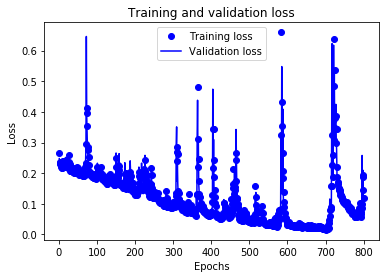

In [321]:
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [324]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09304386307172177
Test accuracy: 0.9641255605381166
